In [1]:
import math
from math import log
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# #http://www.chebfun.org/examples/ode-nonlin/LyapunovExponents.html

In [8]:
def lin_model(y,t):
    sig = 3.0
    lam = 0.1
    du1 = 1 + sig*y[1]
    du2 = -lam*y[1]
    return [du1,du2]

# initial condition
y0 = [1.0, 0.01]
y0_dif = [1.0, 0.01+10e-9]
dt = 0.1


In [17]:
N = 1000
Ts =np.linspace(1,20,20); lexps = []#np.zeros(len(Ts),1)
for T in Ts:
    # time points
    t = np.linspace(0,T,num=int(T/dt))

    # solve ODE
    y1 = odeint(lin_model,y0,t)
    kick_1 = 0.1*np.sin(2*np.pi*y1[-1,0])
    y1[-1,1]+=kick_1
    
    y2 = odeint(lin_model,y0_dif,t)
    kick_2 = 0.1*np.sin(2*np.pi*y2[-1,0])
    y2[-1,1]+=kick_2
    end_times = np.linspace(T,N,int(N/T))
    prev=T
    for i in end_times:
        t = np.linspace(prev+dt,i,num=int((i-prev)/dt))
        traj1=odeint(lin_model,y1[-1,:],t)
        y1=np.vstack((y1,traj1))
        kick_1 = 0.1*np.sin(2*np.pi*y1[-1,0])
        y1[-1,1]+=kick_1
        
        traj2=odeint(lin_model,y2[-1,:],t)
        y2=np.vstack((y2,traj2)) 
        kick_2 = 0.1*np.sin(2*np.pi*y2[-1,0])
        y2[-1,1]+=kick_1
        prev=i
    d = np.sqrt((y1[:,0]-y2[:,0])**2+(y1[:,1]-y2[:,1])**2)
    t_total=np.linspace(0,N,num = int(N/dt))
    logd=np.log(d)
    p=np.polyfit(t_total[0:200],logd[0:200],deg=1)
    polylogd=p[1]+p[0]*np.linspace(0,N,num = int(N/dt))
    slope = polylogd[1] - polylogd[0]
    lexps.append(slope)
    

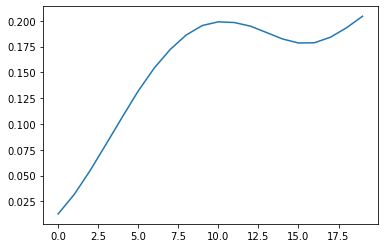

In [18]:
plt.plot(lexps*Ts)

In [19]:
def lin_model2(y,t):
    sig = 0.2
    lam = 0.1
    du1 = 1 + sig*y[1]
    du2 = -lam*y[1]
    return [du1,du2]

# initial condition
y0 = [1.0, 0.01]
y0_dif = [1.0, 0.01+10e-9]
dt = 0.1


In [20]:
N = 1000
Ts =np.linspace(1,20,20); lexps = []#np.zeros(len(Ts),1)
for T in Ts:
    # time points
    t = np.linspace(0,T,num=int(T/dt))

    # solve ODE
    y1 = odeint(lin_model2,y0,t)
    kick_1 = 0.1*np.sin(2*np.pi*y1[-1,0])
    y1[-1,1]+=kick_1
    
    y2 = odeint(lin_model2,y0_dif,t)
    kick_2 = 0.1*np.sin(2*np.pi*y2[-1,0])
    y2[-1,1]+=kick_2
    end_times = np.linspace(T,N,int(N/T))
    prev=T
    for i in end_times:
        t = np.linspace(prev+dt,i,num=int((i-prev)/dt))
        traj1=odeint(lin_model2,y1[-1,:],t)
        y1=np.vstack((y1,traj1))
        kick_1 = 0.1*np.sin(2*np.pi*y1[-1,0])
        y1[-1,1]+=kick_1
        
        traj2=odeint(lin_model2,y2[-1,:],t)
        y2=np.vstack((y2,traj2)) 
        kick_2 = 0.1*np.sin(2*np.pi*y2[-1,0])
        y2[-1,1]+=kick_1
        prev=i
    d = np.sqrt((y1[:,0]-y2[:,0])**2+(y1[:,1]-y2[:,1])**2)
    t_total=np.linspace(0,N,num = int(N/dt))
    logd=np.log(d)
    p=np.polyfit(t_total[0:200],logd[0:200],deg=1)
    polylogd=p[1]+p[0]*np.linspace(0,N,num = int(N/dt))
    slope = polylogd[1] - polylogd[0]
    lexps.append(slope)
    

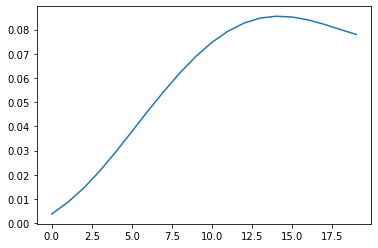

In [21]:
plt.plot(lexps*Ts)

In [22]:
def pred_prey(u,t):
    m=0.25
    k=12
    c=0.6
    du1 = u[0]*(1-u[0]/k)-m*u[1]*u[0]/(1+u[0])
    du2 = -c*u[1]+m*u[0]*u[1]/(1+u[0])
    return [du1,du2]

# initial condition
y0 = [.001,.5]
y0_dif = [.001+10e-9,.5]
dt = 0.1



In [23]:
N = 1000
Ts =np.linspace(1,20,20); lexps = []
for T in Ts:
    # time points
    t = np.linspace(0,T,num=int(T/dt))

    # solve ODE
    y1 = odeint(pred_prey,y0,t)
    kick_1 = 0.1*np.sin(2*np.pi*y1[-1,0])
    y1[-1,1]+=kick_1
    
    y2 = odeint(pred_prey,y0_dif,t)
    kick_2 = 0.1*np.sin(2*np.pi*y2[-1,0])
    y2[-1,1]+=kick_2
    end_times = np.linspace(T,N,int(N/T))
    prev=T
    for i in end_times:
        t = np.linspace(prev+dt,i,num=int((i-prev)/dt))
        traj1=odeint(pred_prey,y1[-1,:],t)
        y1=np.vstack((y1,traj1))
        kick_1 = 0.1*np.sin(2*np.pi*y1[-1,0])
        y1[-1,1]+=kick_1
        
        traj2=odeint(pred_prey,y2[-1,:],t)
        y2=np.vstack((y2,traj2)) 
        kick_2 = 0.1*np.sin(2*np.pi*y2[-1,0])
        y2[-1,1]+=kick_1
        prev=i
    d = np.sqrt((y1[:,0]-y2[:,0])**2+(y1[:,1]-y2[:,1])**2)
    t_total=np.linspace(0,N,num = int(N/dt))
    logd=np.log(d)
    p=np.polyfit(t_total[0:200],logd[0:200],deg=1)
    polylogd=p[1]+p[0]*np.linspace(0,N,num = int(N/dt))
    slope = polylogd[1] - polylogd[0]
    lexps.append(slope)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


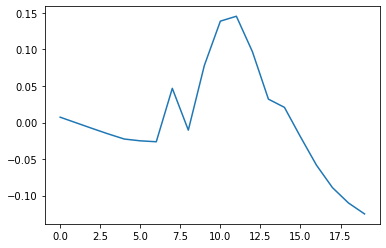

In [24]:
plt.plot(lexps*Ts)